In [1]:
!pip install seaborn

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Matplotlib is building the font cache; this may take a moment.


ModuleNotFoundError: No module named 'sklearn'

In [4]:
!pip install scikit-learn


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [17]:
# Load the dataset
# Use the full path to the file
df = pd.read_csv(r"C:\Users\HI\Downloads\titanic.csv")

# Display the first few rows to confirm it's loaded correctly
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


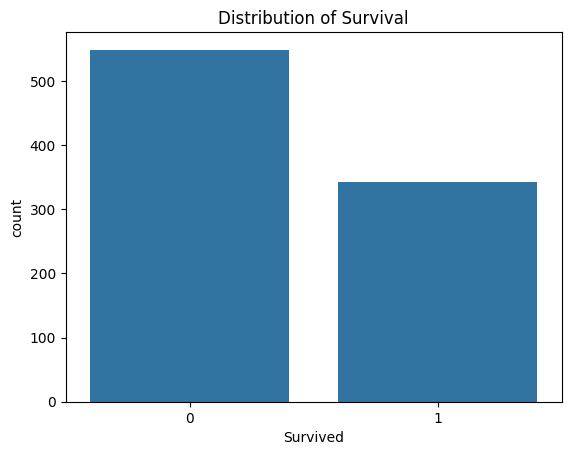

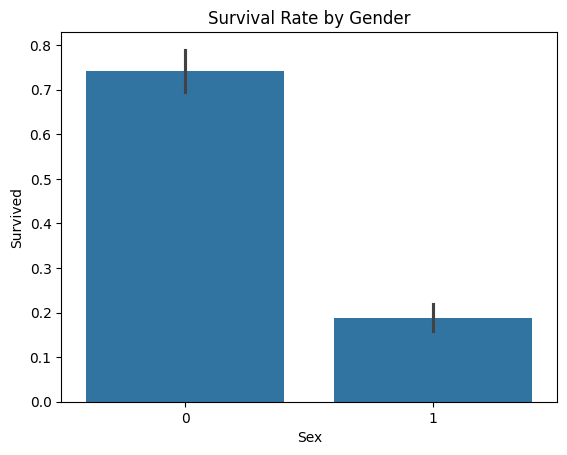

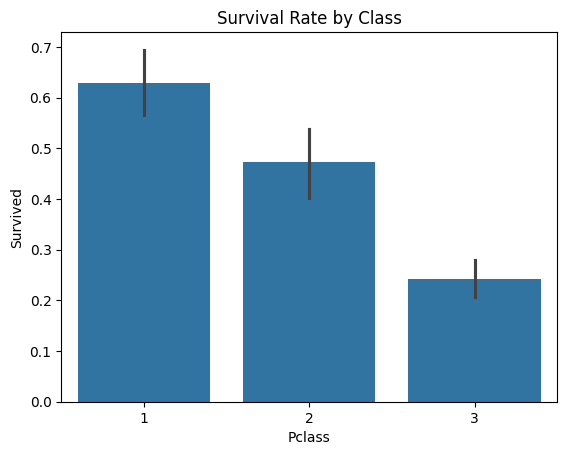

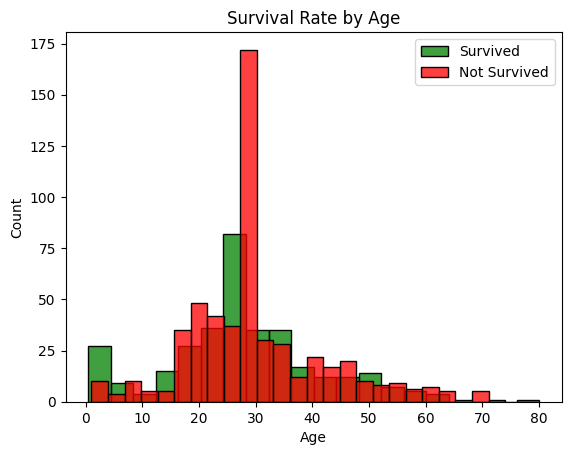

Accuracy: 82.12%
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



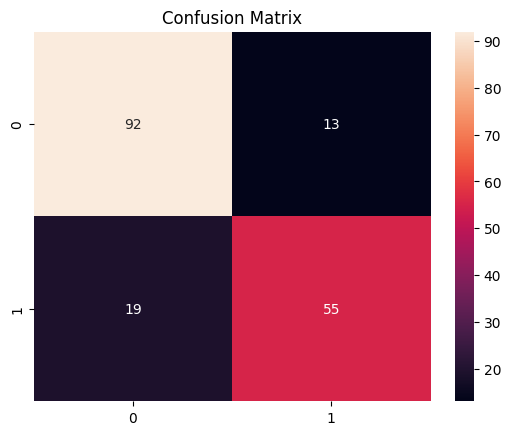

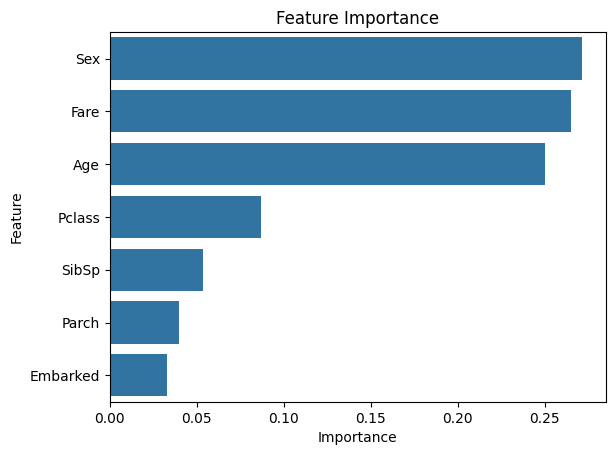

In [20]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv(r"C:\Users\HI\Downloads\titanic.csv")

# Display the first few rows
df.head()

# Handle missing values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Cabin'] = df['Cabin'].fillna('Unknown')

# Drop columns that won't be used in the analysis
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Encode categorical variables
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

# Split the data into features (X) and target (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Plot the distribution of survivors
sns.countplot(x='Survived', data=df)
plt.title('Distribution of Survival')
plt.show()

# Plot survival rate by gender
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.show()

# Plot survival rate by class
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Class')
plt.show()

# Plot survival rate by age
sns.histplot(df[df['Survived'] == 1]['Age'], kde=False, color='green', label='Survived')
sns.histplot(df[df['Survived'] == 0]['Age'], kde=False, color='red', label='Not Survived')
plt.legend()
plt.title('Survival Rate by Age')
plt.show()

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

# Feature importance
importance = model.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()


In [4]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load and Preprocess Data
def load_data(ticker, start_date, end_date):
    df = yf.download(ticker, start=start_date, end=end_date)
    df = df[['Close']]
    return df

# Prepare Data for LSTM
def prepare_data(df, window_size=60):
    data = df.values
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)
    
    X, y = [], []
    for i in range(window_size, len(scaled_data)):
        X.append(scaled_data[i-window_size:i, 0])
        y.append(scaled_data[i, 0])
        
    X, y = np.array(X), np.array(y)
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))
    
    return X, y, scaler

# Build LSTM Model
def build_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(units=50, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Predict Stock Prices
def predict_stock_prices(ticker, start_date, end_date, window_size=60):
    df = load_data(ticker, start_date, end_date)
    X, y, scaler = prepare_data(df, window_size)
    
    # Split Data into Training and Testing
    split = int(0.8 * len(X))
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]
    
    model = build_model((X_train.shape[1], 1))
    
    # Train the Model
    history = model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)
    
    # Make Predictions
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)
    y_test = scaler.inverse_transform([y_test])
    
    # Evaluate the Model
    mse = mean_squared_error(y_test[0], predictions)
    mae = mean_absolute_error(y_test[0], predictions)
    print(f'Mean Squared Error: {mse}')
    print(f'Mean Absolute Error: {mae}')
    
    # Plot Results
    plt.figure(figsize=(14, 7))
    plt.plot(df.index[-len(y_test[0]):], y_test[0], color='blue', label='Actual Prices')
    plt.plot(df.index[-len(predictions):], predictions, color='red', label='Predicted Prices')
    plt.title(f'{ticker} Stock Price Prediction')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

    # Plot Training Loss
    plt.figure(figsize=(14, 7))
    plt.plot(history.history['loss'])
    plt.title('Model Loss During Training')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()
    
    # Plot Prediction vs Actual Prices Over Time
    plt.figure(figsize=(14, 7))
    full_data = df[['Close']].copy()
    full_data = full_data.reset_index()
    full_data = full_data.iloc[window_size + split:]
    full_data['Predictions'] = np.nan
    full_data.iloc[-len(predictions):, full_data.columns.get_loc('Predictions')] = predictions.flatten()
    
    plt.plot(full_data['Date'], full_data['Close'], color='blue', label='Actual Prices')
    plt.plot(full_data['Date'], full_data['Predictions'], color='red', linestyle='--', label='Predicted Prices')
    plt.title(f'{ticker} Stock Prices and Predictions')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

    # Plot the Training and Test Data
    plt.figure(figsize=(14, 7))
    plt.plot(df.index[:split], scaler.inverse_transform(df[['Close']].values[:split]), color='blue', label='Training Data')
    plt.plot(df.index[split:], scaler.inverse_transform(df[['Close']].values[split:]), color='green', label='Testing Data')
    plt.title(f'{ticker} Training and Test Data')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

# Example Usage
predict_stock_prices('AAPL', '2020-01-01', '2023-01-01')


ModuleNotFoundError: No module named 'tensorflow'

In [3]:
!pip install yfinance


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install tensorflow


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


[*********************100%***********************]  1 of 1 completed
C:\Users\HI\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.2287
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.0157
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0056
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0032
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0023
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0021
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0022
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0020
Epoch 9/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0021
Epoch 10/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0019
Epoch 11/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0019
Epoch 12/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0021
Epoch 13/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0017
Epoch 14/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0019
Epoch 15/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0016
Epoc

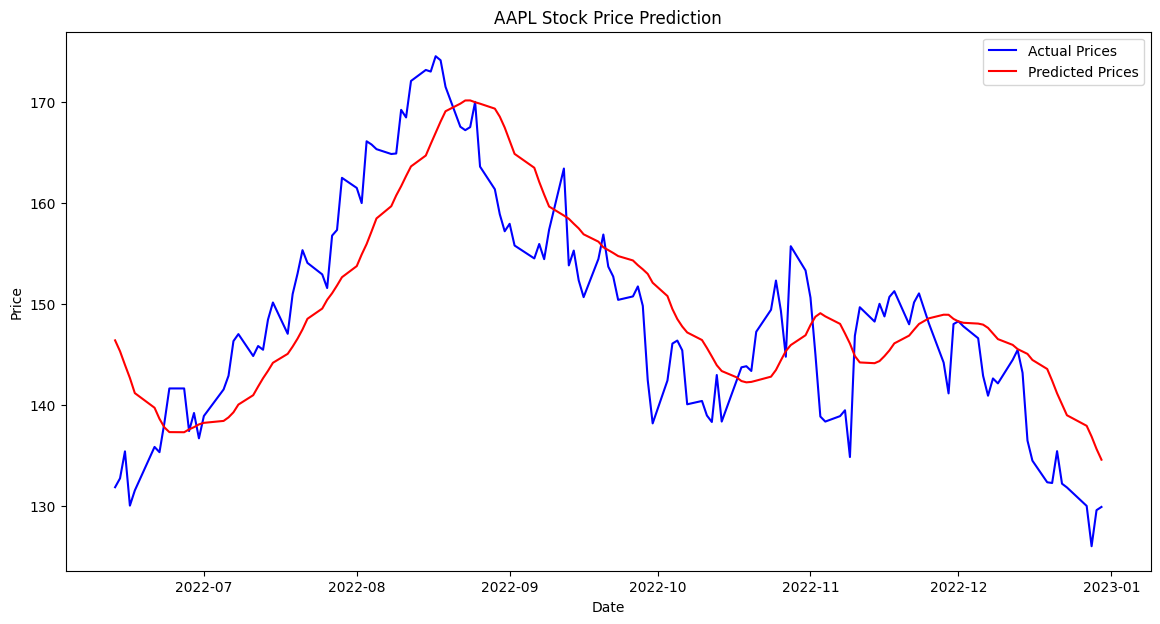

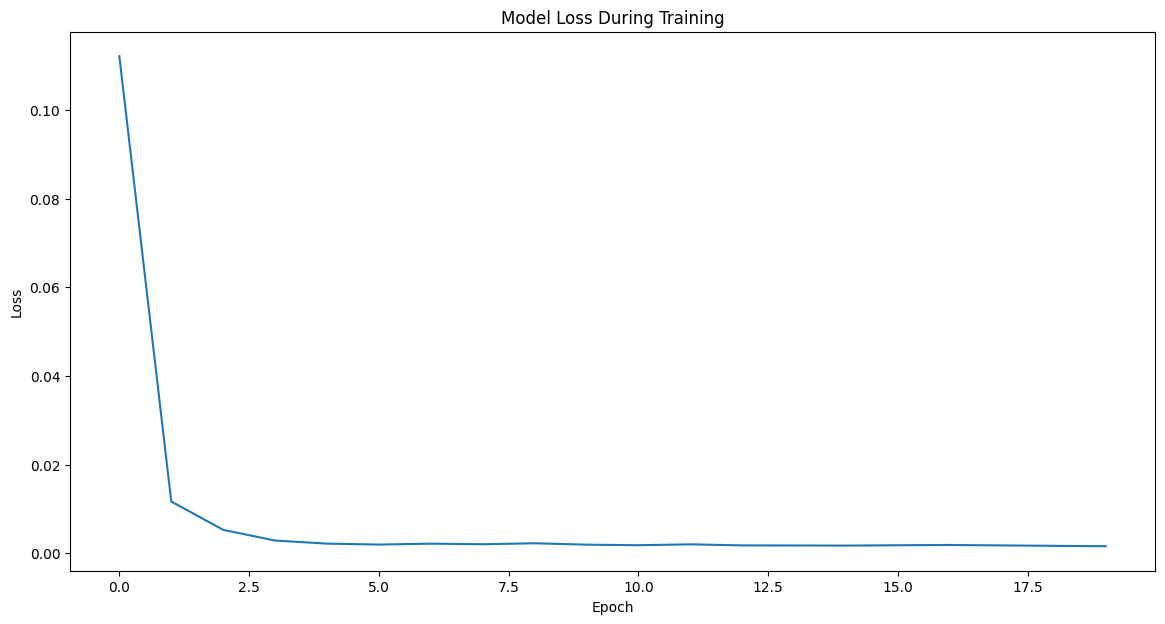

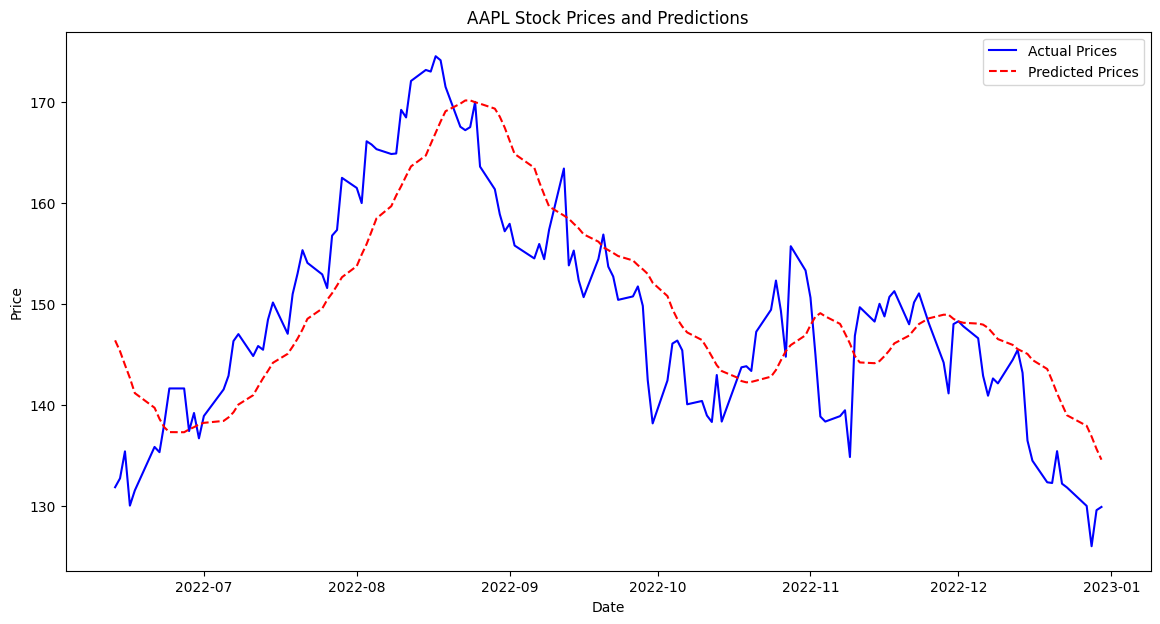

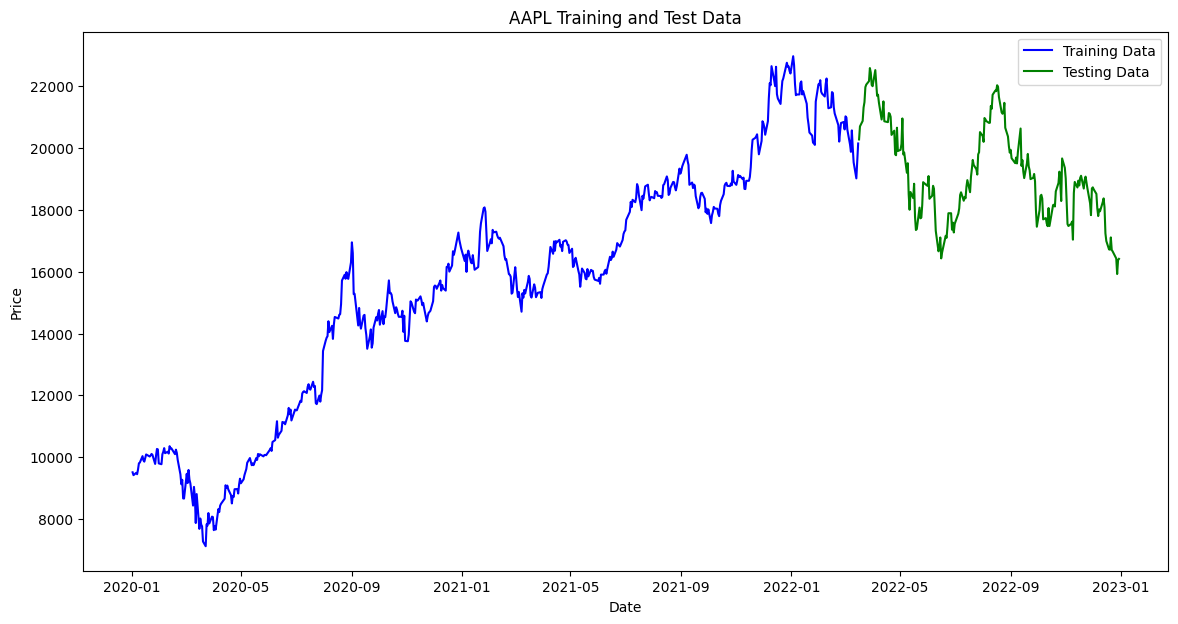

In [3]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load and Preprocess Data
def load_data(ticker, start_date, end_date):
    df = yf.download(ticker, start=start_date, end=end_date)
    df = df[['Close']]
    return df

# Prepare Data for LSTM
def prepare_data(df, window_size=60):
    data = df.values
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)
    
    X, y = [], []
    for i in range(window_size, len(scaled_data)):
        X.append(scaled_data[i-window_size:i, 0])
        y.append(scaled_data[i, 0])
        
    X, y = np.array(X), np.array(y)
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))
    
    return X, y, scaler

# Build LSTM Model
def build_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(units=50, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Predict Stock Prices
def predict_stock_prices(ticker, start_date, end_date, window_size=60):
    df = load_data(ticker, start_date, end_date)
    X, y, scaler = prepare_data(df, window_size)
    
    # Split Data into Training and Testing
    split = int(0.8 * len(X))
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]
    
    model = build_model((X_train.shape[1], 1))
    
    # Train the Model
    history = model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)
    
    # Make Predictions
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)
    y_test = scaler.inverse_transform([y_test])
    
    # Evaluate the Model
    mse = mean_squared_error(y_test[0], predictions)
    mae = mean_absolute_error(y_test[0], predictions)
    print(f'Mean Squared Error: {mse}')
    print(f'Mean Absolute Error: {mae}')
    
    # Plot Results
    plt.figure(figsize=(14, 7))
    plt.plot(df.index[-len(y_test[0]):], y_test[0], color='blue', label='Actual Prices')
    plt.plot(df.index[-len(predictions):], predictions, color='red', label='Predicted Prices')
    plt.title(f'{ticker} Stock Price Prediction')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

    # Plot Training Loss
    plt.figure(figsize=(14, 7))
    plt.plot(history.history['loss'])
    plt.title('Model Loss During Training')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()
    
    # Plot Prediction vs Actual Prices Over Time
    plt.figure(figsize=(14, 7))
    full_data = df[['Close']].copy()
    full_data = full_data.reset_index()
    full_data = full_data.iloc[window_size + split:]
    full_data['Predictions'] = np.nan
    full_data.iloc[-len(predictions):, full_data.columns.get_loc('Predictions')] = predictions.flatten()
    
    plt.plot(full_data['Date'], full_data['Close'], color='blue', label='Actual Prices')
    plt.plot(full_data['Date'], full_data['Predictions'], color='red', linestyle='--', label='Predicted Prices')
    plt.title(f'{ticker} Stock Prices and Predictions')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

    # Plot the Training and Test Data
    plt.figure(figsize=(14, 7))
    plt.plot(df.index[:split], scaler.inverse_transform(df[['Close']].values[:split]), color='blue', label='Training Data')
    plt.plot(df.index[split:], scaler.inverse_transform(df[['Close']].values[split:]), color='green', label='Testing Data')
    plt.title(f'{ticker} Training and Test Data')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

# Example Usage
predict_stock_prices('AAPL', '2020-01-01', '2023-01-01')


In [4]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

NameError: name 'y_test' is not defined

<Figure size 1200x600 with 0 Axes>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout


In [6]:
# Load the data for a specific stock, e.g., Apple
df = yf.download('AAPL', start='2010-01-01', end='2023-01-01')

# Display the first few rows
df.head()


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.454505,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.465663,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.362819,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.351057,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.393282,447610800


In [12]:
data = df['Close'].values
data = data.reshape(-1, 1)

In [10]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)


In [11]:
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Create sequences
def create_dataset(dataset, look_back=60):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:i + look_back, 0])
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 60
X_train, y_train = create_dataset(train_data, look_back)
X_test, y_test = create_dataset(test_data, look_back)

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [ ]:
# Plot Actual Prices vs. Predicted Prices
plt.figure(figsize=(14, 7))
# Ensure correct indexing
plt.plot(df.index[-len(y_test):], scaler.inverse_transform(y_test.reshape(-1, 1)), color='blue', label='Actual Prices')
plt.plot(df.index[-len(predictions):], scaler.inverse_transform(predictions), color='red', linestyle='--', label='Predicted Prices')
plt.title(f'{ticker} Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot Training Loss
plt.figure(figsize=(14, 7))
plt.plot(history.history['loss'])
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Plot Prediction vs. Actual Prices Over Time
plt.figure(figsize=(14, 7))
full_data = df[['Close']].copy()
full_data = full_data.reset_index()
full_data = full_data.iloc[window_size + split:]
full_data['Predictions'] = np.nan
full_data.iloc[-len(predictions):, full_data.columns.get_loc('Predictions')] = predictions.flatten()

plt.plot(full_data['Date'], full_data['Close'], color='blue', label='Actual Prices')
plt.plot(full_data['Date'], full_data['Predictions'], color='red', linestyle='--', label='Predicted Prices')
plt.title(f'{ticker} Stock Prices and Predictions')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot the Training and Test Data
plt.figure(figsize=(14, 7))
plt.plot(df.index[:split], scaler.inverse_transform(df[['Close']].values[:split]), color='blue', label='Training Data')
plt.plot(df.index[split:], scaler.inverse_transform(df[['Close']].values[split:]), color='green', label='Testing Data')
plt.title(f'{ticker} Training and Test Data')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [15]:
# Load the California Housing dataset
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['PRICE'] = california.target

# Display the first few rows of the dataframe
print(df.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  
